### Multiple Inputs - Hidden Layers

This notebook is designed to work with multiple input layers and hidden layers.

It is intended for educational purposes to demonstrate the basic structure of a neural network.


In [20]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [21]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    for i in range(len(x)):
        x[i] = sigmoid(x[i]) * (1 - sigmoid(x[i]))
    return x

In [22]:
def row(list):
    return np.array(list).reshape(1, -1)

def column(list):
    return np.array(list).reshape(-1, 1)

In [23]:
def z(prev_a, w, b):
    return prev_a @ w + b

def c(a, y):
    return sum(((a - y) ** 2)[0])

def dc_da(a, y):
    return 2 * (a - y)

In [ ]:
def forward(x, w_list, b_list, y):
    z_list = [0 for _ in range(len(w_list))]
    a_list = [x] + [0 for _ in range(len(w_list))]
    for i in range(len(w_list)):
        z_list[i] = z(a_list[i], w_list[i], b_list[i])
        a_list[i + 1] = sigmoid(z_list[i])
    c_value = c(a_list[-1], y)
    return z_list, a_list, c_value

def backward(x, w_list, b_list, y, learning_rate=0.1):
    z_list, a_list, c_value = forward(x, w_list, b_list, y)
    dc_dw = [0 for _ in range(len(w_list))]
    dc_db = [0 for _ in range(len(b_list))]
    delta = 1
    dz_da_list = w_list[1:] +  [dc_da(a_list[-1], y)]
    da_dz_list = sigmoid_derivative(z_list)
    dz_dw_list = a_list[:-1]

    for i in range(len(w_list) - 1, -1, -1):
        if i == len(w_list) - 1:
            delta = dz_da_list[i] * da_dz_list[i]
        else:
            delta = (delta @ dz_da_list[i].T) * da_dz_list[i]
        dc_dw[i] = dz_dw_list[i].T @ delta
        dc_db[i] = np.sum(delta, axis=0, keepdims=True).reshape(1, -1)

    for i in range(len(w_list)):
        w_list[i] -= learning_rate * dc_dw[i]
        b_list[i] -= learning_rate * dc_db[i]

    c_value = forward(x, w_list, b_list, y)[2]
    return w_list, b_list, c_value

In [25]:
def hidden(x, w_list, b_list, y, alpha, iters=100, graph=False):
    c_list = []
    c_value = forward(x, w_list, b_list, y)[2]
    c_list.append(c_value)

    for _ in range(iters):
        w_list, b_list, c_value = backward(x, w_list, b_list, y, learning_rate=alpha)
        c_list.append(c_value)

    if graph:
        plt.plot(c_list)
        plt.grid()
        plt.title('Cost Function')
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.yscale('log')

    _, a_value, c_value = forward(x, w_list, b_list, y)
    print('x: ', x)
    print('y: ', y)
    print('a: ', a_value[-1])
    print('Final Cost:', c_value)

x:  [[5 6]]
y:  [[0.8 0.2 0.1]]
a:  [[0.8 0.2 0.1]]
Final Cost: 3.0814879110195774e-32


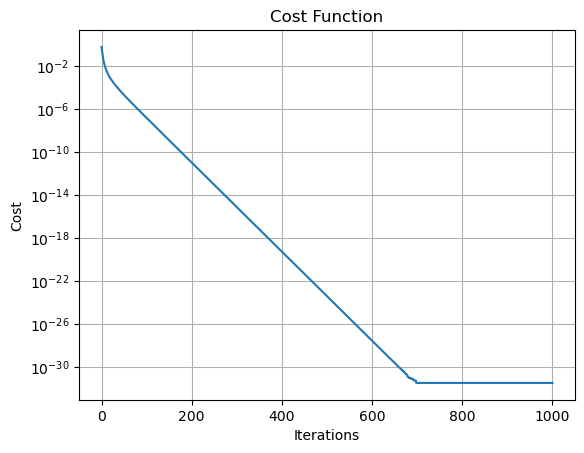

In [26]:
x = row([5, 6])
w_list = [np.array([[0.2, 0.1], [0.3, 0.4]]), np.array([[0.2, 0.1, 0.4], [0.3, 0.4, 0.5]]), np.array([[0.2, 0.1, 0.4], [0.3, 0.4, 0.5], [0.1, 0.2, -0.1]])]
b_list = [row([0.4, 0.8]), row([0.5, 0.6, 0.7]), row([0.1, 0.25, 0.1])]
y = row([0.8, 0.2, 0.1])
alpha = 1

hidden(x, w_list, b_list, y, alpha, iters=1000, graph=True)

In [27]:
def makeInputs(sizes, batch_size=1):
    x = np.random.rand(batch_size, sizes[0])
    w_list = []
    b_list = []
    for i in range(len(sizes) - 1):
        w_list.append(np.random.rand(sizes[i], sizes[i + 1]))
        b_list.append(np.random.rand(1, sizes[i + 1]))
    y = np.random.rand(batch_size, sizes[len(sizes) - 1])
    alpha = random.random()
    return x, w_list, b_list, y, alpha

x:  [[0.59978329 0.57088123 0.09027602 0.45008334 0.54587183]]
y:  [[0.1344875  0.36788585]]
a:  [[0.13453169 0.36788575]]
Final Cost: 1.952455425461327e-09


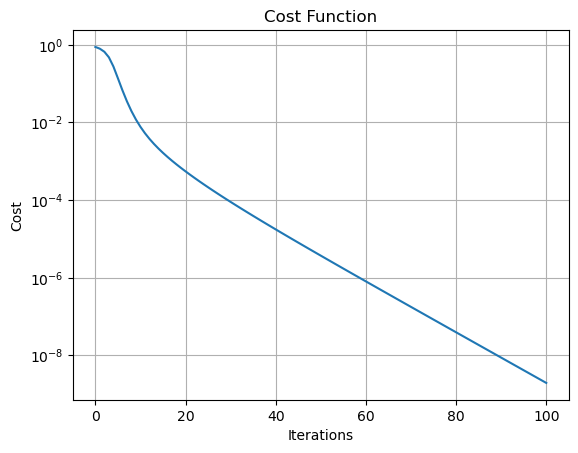

In [28]:
sizes = [5, 3, 4, 3, 2]
x, w_list, b_list, y, alpha = makeInputs(sizes)

hidden(x, w_list, b_list, y, 0.8, iters=100, graph=True)

x:  [[0.48862475 0.01162109]
 [0.30872334 0.78630881]
 [0.47922114 0.72713108]
 [0.44772429 0.18414998]
 [0.17820339 0.78985043]
 [0.57839479 0.49868623]
 [0.44417148 0.68961402]
 [0.77853798 0.48709702]
 [0.86745725 0.39769144]
 [0.7557406  0.20449886]
 [0.63411414 0.84206459]
 [0.1913396  0.10423891]
 [0.66743926 0.82235775]
 [0.69174612 0.33974744]
 [0.73259647 0.20958872]
 [0.25052582 0.18419294]
 [0.41170422 0.32398674]
 [0.68195492 0.54730982]
 [0.08630458 0.74395275]
 [0.00704408 0.70679438]
 [0.46816033 0.94308982]
 [0.91065515 0.37058099]
 [0.7007682  0.24327316]
 [0.51160596 0.2113549 ]
 [0.77236681 0.51744633]
 [0.8728609  0.6463529 ]
 [0.43221619 0.30745421]
 [0.40063195 0.91141714]
 [0.55197951 0.45707178]
 [0.5739112  0.83402251]
 [0.95347231 0.21341498]
 [0.39692166 0.45293619]
 [0.9113939  0.31608228]
 [0.04222239 0.92774893]
 [0.00290506 0.21853391]
 [0.5308118  0.71783718]
 [0.25824807 0.97978466]
 [0.94129396 0.32877161]
 [0.63567075 0.98864882]
 [0.27719467 0.243609

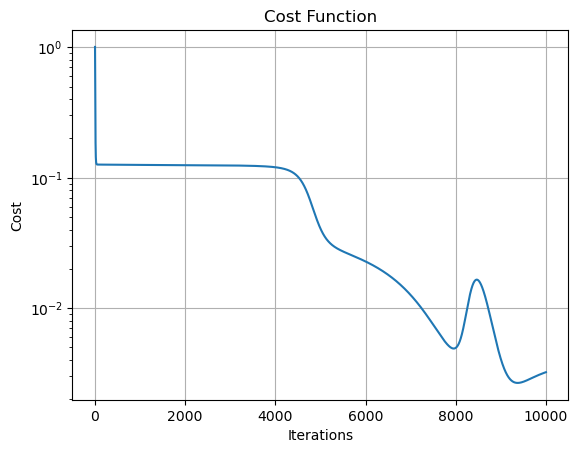

In [29]:
sizes = [2, 2, 3, 2]
x, w_list, b_list, y, alpha = makeInputs(sizes, 500)
y = x**2

hidden(x, w_list, b_list, y, .001, iters=10000, graph=True)

In [30]:
x = np.array([[0.1, 0.2], [0.3, 0.4], [0.5, 0.6]])
y = x **2
_, a_value, c_value = forward(x, w_list, b_list, y)
print('x: ', x)
print('y: ', y)
print('a: ', a_value[-1])
print('Final Cost:', c_value)

x:  [[0.1 0.2]
 [0.3 0.4]
 [0.5 0.6]]
y:  [[0.01 0.04]
 [0.09 0.16]
 [0.25 0.36]]
a:  [[0.07292194 0.07300548]
 [0.0972806  0.13071006]
 [0.20216566 0.3362967 ]]
Final Cost: 0.0050485323292096896
